#### This program aims to recreate the plots and diagrams in Section 2.3 of Physics by Computer by Kinzel and Reents.

## 2.3 Chain Vibrations

We consider a chain consisting of pointlike masses $m_1$ and $m_2$, designated as light and heavy, respectively. One heavy atom follows three light ones. The unit cell of length $a$ contains four atoms. The forces to be considered are linear functions of the shifts of the masses. 

Let $r_n$, $s_n$, and $t_n$ be the displacements of the light atoms from rest, and let $u_n$ be the displacement of the heavy atom. 

The equations of motion are
$$m_1\ddot{r_n}\ =\ f(s_n-r_n)-f(r_n-u_{n-i})\ =\ f(s_n+u_{n-i}-2r_n)$$
$$m_1\ddot{s_n}\ =\ f(t_n+r_n-2s_n)$$
$$m_1\ddot{t_n}\ =\ f(u_n+s_n-2t_n)$$
$$m_2\ddot{u_n}\ =\ f(r_{n+1}+t_n-2u_n)$$
where f is the spring constant.

For a finite chain consisting of $N$ unit cells, we assume periodic boundary conditions: ringlike arrangement. Energy of the chain does not change if it is shifted by distance $a$. Equations of motion are invariant under the translations $\{r_n,s_n,t_n,u_n\}\rightarrow \{r_{n+k},s_{n+k},t_{n+k},u_{n+k}\}$ where $k=1,2,...N$. 

Therefore, we use the ansatz
$$x_n(t)\ =\ 
\begin{bmatrix}
r_n(t)\\
s_n(t)\\
t_n(t)\\
u_n(t)\\
\end{bmatrix}\ =\ \textbf{S}(q)\ exp(iqan\pm i\omega t)$$
where q can only take the values $q_v\ =\ 2\pi v/(Na),\ v=-N/2+1,...,N/2$

Inserting this into the linear equations above, we get
$$\begin{bmatrix}
2f & -f & 0 & -fe^{-iqa}\\
-f & 2f & -f & 0\\
0 & -f & 2f & -f\\
-fe^{iqa} & 0 & -f & 2f\\
\end{bmatrix}\ \textbf{S}(q)\ =\ \omega^2\
\begin{bmatrix}
m_1 & 0 & 0 & 0\\
0 & m_1 & 0 & 0\\
0 & 0 & m_1 & 0\\
0 & 0 & 0 & m_2\\
\end{bmatrix}\ \textbf{S}(q)$$
which is a generalized eigenvalue equation of the type  $F\textbf{S}\ =\ \lambda M\textbf{S}$. We are looking for the eigenvalues $\lambda (q)=\omega^2(q)$ and corresponding normal modes $\textbf{S}(q)$.

$$M^{-1}F\textbf{S}\ =\ \lambda \textbf{S}$$
$$M^{-1/2}FM^{-1/2}M^{1/2}\textbf{S}\ =\ \lambda M^{1/2}\textbf{S}$$

This is an ordinary eigenvalue equation for the positive semidefinite Hermitian matrix $M^{-1/2}FM^{-1/2}$ with the eigenvector $M^{1/2}\textbf{S}$.

The eigenmodes $x_n(t)\ =\ S_l(q_v)\ exp(iq_van\pm i\omega_v t)$ are complex-valued solutions of the equations of motion. The general solution can be obtained by the superpostion of the eigenmodes. From the complex conjugate of the first matrix equation and the substitution $q \rightarrow -q$, we see that $\textbf{S}(-q)^*$ is an eigenvector as well, with the same eigenvalue.

The general real solution of the equations of motion are thus
$$x_n(t)\ =\ \sum_{v,l}\textbf{S}_l(q_v)\ exp(iq_van)\ [c_{vl} exp(iw_vt)+c_{-vl}^* exp(-iw_vt)]$$

In [1]:
from numpy import matrix, exp, matmul, pi, diag, linspace, sqrt, absolute, real, transpose, sort, array
from numpy.linalg import inv, eig, eigvals
from matplotlib.pyplot import plot,xlabel,ylabel,xlim,ylim,xticks,subplots,show
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

### Declare constants

In [2]:
a = 1 #unit cell length
f = 1.0 #spring constant
m1 = 0.4 #light mass
m2 = 1.0 #heavy mass
x = linspace(-pi,pi,313) #values of q

### Declare function containing matrix F, and mass matrix M

In [3]:
def mat1(q): #matrix F
    return matrix([[2*f, -f, 0, -f*exp(-1j*q*a)],
                   [-f, 2*f, -f, 0], 
                   [0, -f, 2*f, -f], 
                   [-f*exp(1j*q*a), 0, -f, 2*f]])

massmat = diag([m1,m1,m1,m2]) #mass matrix M

### Matrix multiplication of inverse(M) and F

In [4]:
def mat2(q): #M^{-1}F matrix multiplication
    return matmul(inv(massmat),mat1(q))

### Solve for the eigenvalues and eigenvectors for each q

In [5]:
eigenlist = []
eigenvecs = []
for i in x:
    eigenlist.append(eigvals(mat2(i))) #solving for eigenvalues (omega^2) for each q
    eigenvecs.append(eig(mat2(i))[1]) #solving for eigenvector S
    
eigenvals = abs(sort(real(eigenlist)))

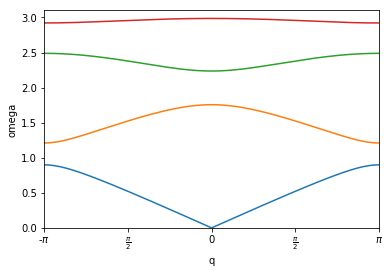

In [6]:
plot(x,sqrt(eigenvals))
xlabel("q")
ylabel("omega")
xticks(linspace(-pi,pi,5),[r"-$\pi$", r"$\frac{\pi}{2}$", "0", r"$\frac{\pi}{2}$", r"$\pi$"])
xlim(-pi,pi)
ylim(0,3.1)
show()

The allowed frequencies of the lattice vibrations form four bands. The lowest branch represents acoustic phonons: atoms almost always oscillate in the same direction. At $q=0$, the entire chain is shifted as a whole: no energy ($\omega =0$). The three upper branches represent the optical phonons. They have many atoms oscillating against each other: requires energy. 

### Function containing the general real solution of the equations of motion

In [7]:
def x_n(t):
    xn = []
    xi = [0.125,0.375,0.625,0.875]
    for i in [0,1,2,3]:
        xn.append(xi[i] + 0.10*real((exp(1j*omega[mode]*t)+exp(-1j*omega[mode]*t))*array(S[mode])[0][i]))
    points.set_xdata(xn)
    return points

The plot below shows the initial positions of the particles with a=1, with the one on the farthest right being the heaviest, and the rest are the lighter particles. The succeeding animations show the oscillation of the particles for the different eigenmodes with q=0.

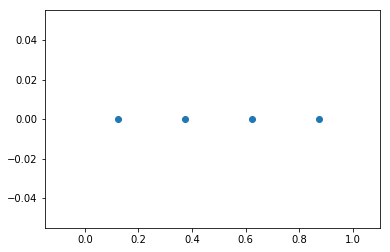

In [8]:
q = 0
index = list(x).index(q)
omega = sqrt(eigenvals[index])
S = transpose(real(eigenvecs[index]))

fig, ax = subplots()
ax.set_xlim(-0.15,1.1)
points = ax.plot([0.125,0.375,0.625,0.875],[0,0,0,0], 'o')[0] #initial positions of particles

The animation below shows the vibration of the particles for the fourth mode.

In [9]:
mode = 0
t = linspace(0,(2*pi)/omega[mode]) #1 period of oscillation
ani1 = FuncAnimation(fig,x_n,t)
HTML(ani1.to_jshtml(fps=20))

The animation below shows the vibration of the particles for the first mode.

In [10]:
mode = 1
t = linspace(0,(2*pi)/omega[mode]) #1 period of oscillation
ani2 = FuncAnimation(fig,x_n,t)
HTML(ani2.to_jshtml(fps=20))

The animation below shows the vibration of the particles for the third mode.

In [11]:
mode = 2
t = linspace(0,(2*pi)/omega[mode]) #1 period of oscillation
ani3 = FuncAnimation(fig,x_n,t)
HTML(ani3.to_jshtml(fps=20))

The animation below shows the vibration of the particles for the second mode.

In [12]:
mode = 3
t = linspace(0,(2*pi)/omega[mode]) #1 period of oscillation
ani4 = FuncAnimation(fig,x_n,t)
HTML(ani4.to_jshtml(fps=20))